# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [229]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


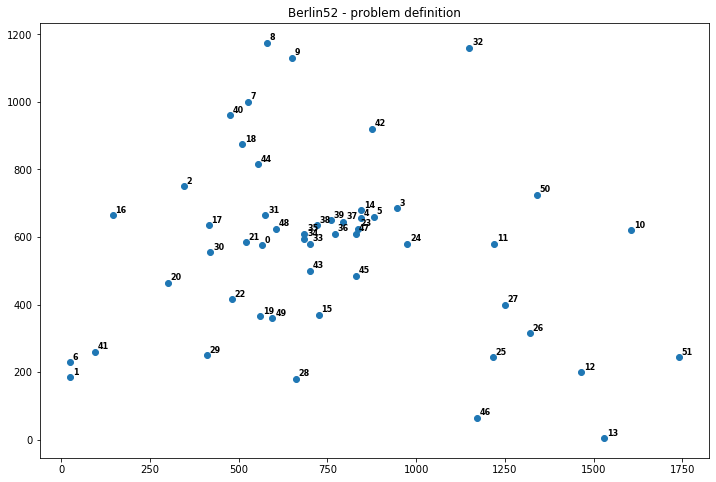

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

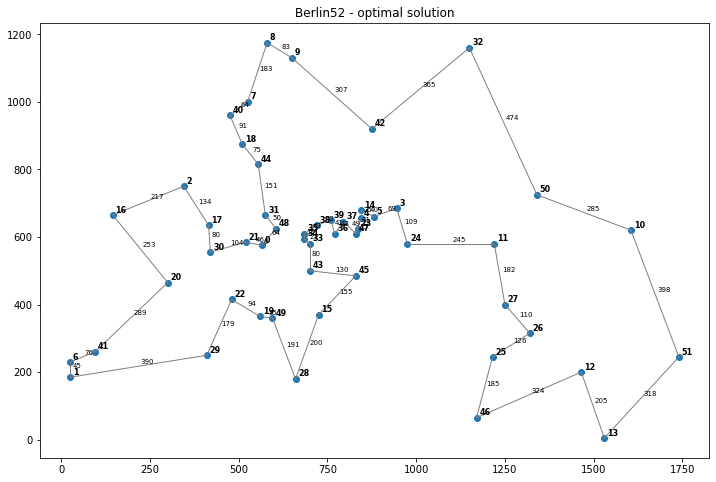

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [252]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [240]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [258]:
random_bests = np.zeros(10)
sa_bests = np.zeros(10)
sga_bests = np.zeros(10)
sga_bests2 = np.zeros(10)

In [259]:
costs_sa = np.zeros(500000)
costs_sga = np.zeros(250)

In [260]:
for jj in range(10):
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :])

    #print(time.time() - t0)

    p = permutations[costs.argmin(), :]
    random_bests[jj] = tsp_objective_function(p)
    #print(tsp_objective_function(p), p)

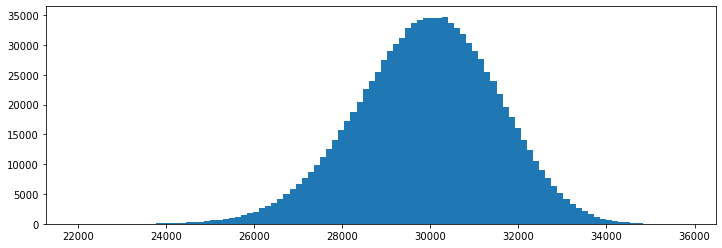

29915.35584742515 1578.35943138016


In [8]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [9]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [261]:
for jj in range(10):
    T = 500000
    radius = 1
    alpha = 1.0

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    sa_bests[jj] = costs.min()

28.649122714996338 8586.159880021114
29.199394464492798 9265.337839902402
29.89716911315918 8333.109146802431
29.76012420654297 8617.965252533057
29.00136637687683 9087.005871671226
30.581899166107178 8525.632952057398
29.906402349472046 9283.248182880496
29.551771640777588 9342.845912945419
29.65514588356018 9209.429348003232
30.018155097961426 9001.625248822325


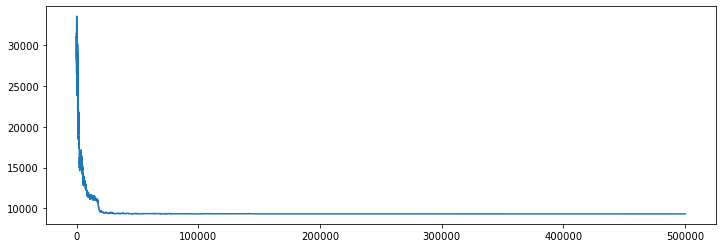

In [11]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [263]:
def PMX(ind1, ind2):
    a = np.random.choice(len(ind1)-2, 2, False)
    i, j = a.min(), a.max()
    np.vstack((ind1[i:j],ind2[i:j])).T
    match = np.zeros(len(ind1)).astype(int)
    for p in np.vstack((ind1[i:j],ind2[i:j])).T:
        match[p[0]] = p[1]    
        match[p[1]] = p[0]
    
    child1 = np.concatenate((ind1[:i], ind2[i:j], ind1[j:]))
    child2 = np.concatenate((ind2[:i], ind1[i:j], ind2[j:]))

    for k in np.delete(np.arange(len(ind1)), np.arange(i,j)):
        while child1[k] in ind2[i:j]:
            index = np.where(ind2[i:j] == child1[k])[0][0]
            child1[k] = ind1[i:j][index]
        while child2[k] in ind1[i:j]:
            index = np.where(ind1[i:j] == child2[k])[0][0]
            child2[k] = ind2[i:j][index]
    return child1, child2

In [169]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [170]:
def reverse_sequence_mutation2(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i], q[j] = q[j], q[i]
    return q

In [269]:
def sga():
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation2(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]
        costs_sga[t] = objective_values[0]
        #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
        
    return tsp_objective_function(best_chromosome)

# b)

7821.304944840836
8333.109146802431
20715.1848930916


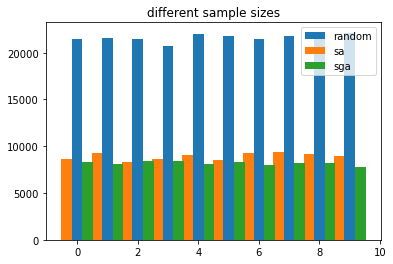

In [267]:
for jj in range(10):
    sga_bests[jj] = sga()

plt.figure()
n_bins = 10
colors = ['red','yellow', 'blue']
labels = ['red flowers', 'yellow flowers', 'blue flowers']
#plt.hist(random_bests)
x = np.vstack((random_bests, sa_bests, sga_bests)).T
width = 0.35
plt.bar( np.arange(len(random_bests)), random_bests, width, label = 'random')
plt.bar( np.arange(len(sa_bests)) - width, sa_bests, width, label = 'sa')
plt.bar( np.arange(len(sga_bests))+width, sga_bests, width, label = 'sga')
plt.legend()
plt.title('different sample sizes')
print(sga_bests.min())
print(sa_bests.min())
print(random_bests.min())

# c)

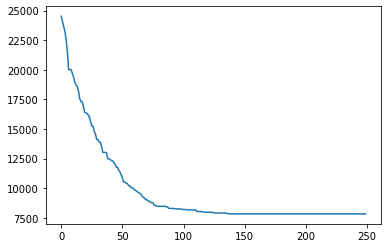

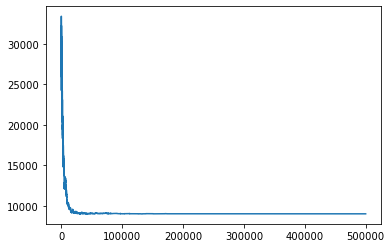

In [268]:
plt.figure()
plt.plot(costs_sga)
plt.show()
plt.figure()
plt.plot(costs)
plt.show()

# d)

In [270]:
for jj in range(10):
    sga_bests2[jj] = sga()
print(sga_bests2)

[ 8892.04792515  8973.35361159 10208.32725821  9672.14538076
 10186.34479121 10230.44583373 10231.7108021   9234.3437991
  9641.54871803  9001.33241054]


# e)

In [175]:
bayg29_coords = [1150.0, 1760.0, 630.0, 1660.0, 40.0, 2090.0, 750.0, 1100.0, 750.0, 2030.0, 1030.0, 2070.0, 1650.0, 650.0, 1490.0, 1630.0, 790.0, 2260.0, 710.0, 1310.0, 840.0, 550.0, 1170.0, 2300.0, 970.0, 1340.0, 510.0, 700.0, 750.0, 900.0, 1280.0, 1200.0, 230.0, 590.0, 460.0, 860.0, 1040.0, 950.0, 590.0, 1390.0, 830.0, 1770.0, 490.0, 500.0, 1840.0, 1240.0, 1260.0, 1500.0, 1280.0, 790.0, 490.0, 2130.0, 1460.0, 1420.0, 1260.0, 1910.0, 360.0, 1980.0] 
bayg29_opt = [1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]

bays29_coords = [1150.0, 1760.0, 630.0, 1660.0, 40.0, 2090.0, 750.0, 1100.0, 750.0, 2030.0, 1030.0, 2070.0, 1650.0,  650.0, 1490.0, 1630.0, 790.0, 2260.0, 710.0, 1310.0, 840.0,  550.0, 1170.0, 2300.0, 970.0, 1340.0, 510.0,  700.0, 750.0,  900.0, 1280.0, 1200.0, 230.0,  590.0, 460.0,  860.0, 1040.0,  950.0, 590.0, 1390.0, 830.0, 1770.0, 490.0,  500.0, 1840.0, 1240.0, 1260.0, 1500.0, 1280.0,  790.0, 490.0, 2130.0, 1460.0, 1420.0, 1260.0, 1910.0, 360.0, 1980.0]
bays29_opt = [1, 28, 6, 12, 9, 5, 26, 29, 3, 2, 20, 10, 4, 15, 18, 17, 14, 22, 11, 19, 25, 7, 23, 27, 8, 24, 16, 13, 21]

kroC100_coords = [1357, 1905, 2650, 802, 1774, 107, 1307, 964, 3806, 746, 2687, 1353, 43, 1957, 3092, 1668, 185, 1542, 834, 629, 40, 462, 1183, 1391, 2048, 1628, 1097, 643, 1838, 1732, 234, 1118, 3314, 1881, 737, 1285, 779, 777, 2312, 1949, 2576, 189, 3078, 1541, 2781, 478, 705, 1812, 3409, 1917, 323, 1714, 1660, 1556, 3729, 1188, 693, 1383, 2361, 640, 2433, 1538, 554, 1825, 913, 317, 3586, 1909, 2636, 727, 1000, 457, 482, 1337, 3704, 1082, 3635, 1174, 1362, 1526, 2049, 417, 2552, 1909, 3939, 640, 219, 898, 812, 351, 901, 1552, 2513, 1572, 242, 584, 826, 1226, 3278, 799, 86, 1065, 14, 454, 1327, 1893, 2773, 1286, 2469, 1838, 3835, 963, 1031, 428, 3853, 1712, 1868, 197, 1544, 863, 457, 1607, 3174, 1064, 192, 1004, 2318, 1925, 2232, 1374, 396, 828, 2365, 1649, 2499, 658, 1410, 307, 2990, 214, 3646, 1018, 3394, 1028, 1779, 90, 1058, 372, 2933, 1459, 3099, 173, 2178, 978, 138, 1610, 2082, 1753, 2302, 1127, 805, 272, 22, 1617, 3213, 1085, 99, 536, 1533, 1780, 3564, 676, 29, 6, 3808, 1375, 2221, 291, 3499, 1885, 3124, 408, 781, 671, 1027, 1041, 3249, 378, 3297, 491, 213, 220, 721, 186, 3736, 1542, 868, 731, 960, 303]
kroC100_opt = [1, 85, 27, 15, 13, 79, 64, 20, 42, 55, 67, 47, 31, 65, 80, 77, 30, 68, 35, 2, 54, 6, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 39, 38, 71, 56, 43, 5, 86, 72, 83, 62, 50, 95, 94, 91, 76, 70, 23, 21, 89, 41, 59, 73, 3, 69, 60, 4, 93, 99, 19, 92, 10, 14, 36, 57, 74, 100, 33, 45, 81, 97, 96, 87, 52, 11, 84, 48, 66, 44, 63, 51, 16, 37, 9, 78, 82, 7, 26, 61, 32, 24, 46, 29, 18, 49, 12, 40, 53]

kroA100_coords = [1380, 939, 2848, 96, 3510, 1671, 457, 334, 3888, 666, 984, 965, 2721, 1482, 1286, 525, 2716, 1432, 738, 1325, 1251, 1832, 2728, 1698, 3815, 169, 3683, 1533, 1247, 1945, 123, 862, 1234, 1946, 252, 1240, 611, 673, 2576, 1676, 928, 1700, 53, 857, 1807, 1711, 274, 1420, 2574, 946, 178, 24, 2678, 1825, 1795, 962, 3384, 1498, 3520, 1079, 1256, 61, 1424, 1728, 3913, 192, 3085, 1528, 2573, 1969, 463, 1670, 3875, 598, 298, 1513, 3479, 821, 2542, 236, 3955, 1743, 1323, 280, 3447, 1830, 2936, 337, 1621, 1830, 3373, 1646, 1393, 1368, 3874, 1318, 938, 955, 3022, 474, 2482, 1183, 3854, 923, 376, 825, 2519, 135, 2945, 1622, 953, 268, 2628, 1479, 2097, 981, 890, 1846, 2139, 1806, 2421, 1007, 2290, 1810, 1115, 1052, 2588, 302, 327, 265, 241, 341, 1917, 687, 2991, 792, 2573, 599, 19, 674, 3911, 1673, 872, 1559, 2863, 558, 929, 1766, 839, 620, 3893, 102, 2178, 1619, 3822, 899, 378, 1048, 1178, 100, 2599, 901, 3416, 143, 2961, 1605, 611, 1384, 3113, 885, 2597, 1830, 2586, 1286, 161, 906, 1429, 134, 742, 1025, 1625, 1651, 1187, 706, 1787, 1009, 22, 987, 3640, 43, 3756, 882, 776, 392, 1724, 1642, 198, 1810, 3950, 1558]
kroA100_opt = [1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63]

kroA150_coords = [1380, 939, 2848, 96, 3510, 1671, 457, 334, 3888, 666, 984, 965, 2721, 1482, 1286, 525, 2716, 1432, 738, 1325, 1251, 1832, 2728, 1698, 3815, 169, 3683, 1533, 1247, 1945, 123, 862, 1234, 1946, 252, 1240, 611, 673, 2576, 1676, 928, 1700, 53, 857, 1807, 1711, 274, 1420, 2574, 946, 178, 24, 2678, 1825, 1795, 962, 3384, 1498, 3520, 1079, 1256, 61, 1424, 1728, 3913, 192, 3085, 1528, 2573, 1969, 463, 1670, 3875, 598, 298, 1513, 3479, 821, 2542, 236, 3955, 1743, 1323, 280, 3447, 1830, 2936, 337, 1621, 1830, 3373, 1646, 1393, 1368, 3874, 1318, 938, 955, 3022, 474, 2482, 1183, 3854, 923, 376, 825, 2519, 135, 2945, 1622, 953, 268, 2628, 1479, 2097, 981, 890, 1846, 2139, 1806, 2421, 1007, 2290, 1810, 1115, 1052, 2588, 302, 327, 265, 241, 341, 1917, 687, 2991, 792, 2573, 599, 19, 674, 3911, 1673, 872, 1559, 2863, 558, 929, 1766, 839, 620, 3893, 102, 2178, 1619, 3822, 899, 378, 1048, 1178, 100, 2599, 901, 3416, 143, 2961, 1605, 611, 1384, 3113, 885, 2597, 1830, 2586, 1286, 161, 906, 1429, 134, 742, 1025, 1625, 1651, 1187, 706, 1787, 1009, 22, 987, 3640, 43, 3756, 882, 776, 392, 1724, 1642, 198, 1810, 3950, 1558, 3477, 949, 91, 1732, 3972, 329, 198, 1632, 1806, 733, 538, 1023, 3430, 1088, 2186, 766, 1513, 1646, 2143, 1611, 53, 1657, 3404, 1307, 1034, 1344, 2823, 376, 3104, 1931, 3232, 324, 2790, 1457, 374, 9, 741, 146, 3083, 1938, 3502, 1067, 1280, 237, 3326, 1846, 217, 38, 2503, 1172, 3527, 41, 739, 1850, 3548, 1999, 48, 154, 1419, 872, 1689, 1223, 3468, 1404, 1628, 253, 382, 872, 3029, 1242, 3646, 1758, 285, 1029, 1782, 93, 1067, 371, 2849, 1214, 920, 1835, 1741, 712, 876, 220, 2753, 283, 2609, 1286, 3941, 258, 3613, 523, 1754, 559, 2916, 1724, 2445, 1820]

kroA200_coords = [1357, 1905, 2650, 802, 1774, 107, 1307, 964, 3806, 746, 2687, 1353, 43, 1957, 3092, 1668, 185, 1542, 834, 629, 40, 462, 1183, 1391, 2048, 1628, 1097, 643, 1838, 1732, 234, 1118, 3314, 1881, 737, 1285, 779, 777, 2312, 1949, 2576, 189, 3078, 1541, 2781, 478, 705, 1812, 3409, 1917, 323, 1714, 1660, 1556, 3729, 1188, 693, 1383, 2361, 640, 2433, 1538, 554, 1825, 913, 317, 3586, 1909, 2636, 727, 1000, 457, 482, 1337, 3704, 1082, 3635, 1174, 1362, 1526, 2049, 417, 2552, 1909, 3939, 640, 219, 898, 812, 351, 901, 1552, 2513, 1572, 242, 584, 826, 1226, 3278, 799, 86, 1065, 14, 454, 1327, 1893, 2773, 1286, 2469, 1838, 3835, 963, 1031, 428, 3853, 1712, 1868, 197, 1544, 863, 457, 1607, 3174, 1064, 192, 1004, 2318, 1925, 2232, 1374, 396, 828, 2365, 1649, 2499, 658, 1410, 307, 2990, 214, 3646, 1018, 3394, 1028, 1779, 90, 1058, 372, 2933, 1459, 3099, 173, 2178, 978, 138, 1610, 2082, 1753, 2302, 1127, 805, 272, 22, 1617, 3213, 1085, 99, 536, 1533, 1780, 3564, 676, 29, 6, 3808, 1375, 2221, 291, 3499, 1885, 3124, 408, 781, 671, 1027, 1041, 3249, 378, 3297, 491, 213, 220, 721, 186, 3736, 1542, 868, 731, 960, 303, 1380, 939, 2848, 96, 3510, 1671, 457, 334, 3888, 666, 984, 965, 2721, 1482, 1286, 525, 2716, 1432, 738, 1325, 1251, 1832, 2728, 1698, 3815, 169, 3683, 1533, 1247, 1945, 123, 862, 1234, 1946, 252, 1240, 611, 673, 2576, 1676, 928, 1700, 53, 857, 1807, 1711, 274, 1420, 2574, 946, 178, 24, 2678, 1825, 1795, 962, 3384, 1498, 3520, 1079, 1256, 61, 1424, 1728, 3913, 192, 3085, 1528, 2573, 1969, 463, 1670, 3875, 598, 298, 1513, 3479, 821, 2542, 236, 3955, 1743, 1323, 280, 3447, 1830, 2936, 337, 1621, 1830, 3373, 1646, 1393, 1368, 3874, 1318, 938, 955, 3022, 474, 2482, 1183, 3854, 923, 376, 825, 2519, 135, 2945, 1622, 953, 268, 2628, 1479, 2097, 981, 890, 1846, 2139, 1806, 2421, 1007, 2290, 1810, 1115, 1052, 2588, 302, 327, 265, 241, 341, 1917, 687, 2991, 792, 2573, 599, 19, 674, 3911, 1673, 872, 1559, 2863, 558, 929, 1766, 839, 620, 3893, 102, 2178, 1619, 3822, 899, 378, 1048, 1178, 100, 2599, 901, 3416, 143, 2961, 1605, 611, 1384, 3113, 885, 2597, 1830, 2586, 1286, 161, 906, 1429, 134, 742, 1025, 1625, 1651, 1187, 706, 1787, 1009, 22, 987, 3640, 43, 3756, 882, 776, 392, 1724, 1642, 198, 1810, 3950, 1558]

In [217]:
def run_instance(coords, opt = None):
    n = int(len(coords)/2)
    print('Problem size: %d' % n)

    coords = np.array(coords).astype(int)
    coords = coords.reshape(int(n), 2).astype(int)

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

    if opt is not None:
        print('Optimal solution:\n', tsp_objective_function(np.array(opt),A.copy(),n))
    print('SGA solution:\n', sga(A,n))

In [255]:
print(sga())
#coords = np.array([565.0, 575.`0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])

#run_instance(coords,p)

  0     0.15716863 24123.37982876 28410.47701066 29865.01765356 1106.02789668
  1     0.28018188 21709.34521183 27108.26663923 28463.17203390 1104.87617177
  2     0.40890861 21709.34521183 25925.14184736 27276.67709030 1130.84485674
  3     0.54361939 20565.99186187 24732.99988448 26158.54103790 1165.44578479
  4     0.66494966 18722.10271770 23593.25495687 25024.18232464 1070.71776359
  5     0.79325843 18722.10271770 22667.68705361 23966.88259546 1039.33919510
  6     0.91860723 18284.36216541 21838.50680806 23056.20096859 937.93491465
  7     1.04148316 16436.40391034 21028.52850806 22131.05646628 931.00813648
  8     1.16218448 14224.60550716 20169.06560479 21354.82480796 1051.89877502
  9     1.28710246 13684.69640545 19097.04278846 20445.56295437 1247.11600261
 10     1.41505575 13482.60127194 17795.36731401 19389.28894224 1230.52171778
 11     1.53847671 12002.68988031 16668.81796903 18117.15893342 1144.72639858
 12     1.66435671 9559.86600842 15467.24990660 16861.21738148 110

114    15.64135075   0.00000000   0.00000000   0.00000000   0.00000000
115    15.78491831   0.00000000   0.00000000   0.00000000   0.00000000
116    15.93609095   0.00000000   0.00000000   0.00000000   0.00000000
117    16.08045888   0.00000000   0.00000000   0.00000000   0.00000000
118    16.21160245   0.00000000   0.00000000   0.00000000   0.00000000
119    16.34747887   0.00000000   0.00000000   0.00000000   0.00000000
120    16.48647594   0.00000000   0.00000000   0.00000000   0.00000000
121    16.62107825   0.00000000   0.00000000   0.00000000   0.00000000
122    16.75411749   0.00000000   0.00000000   0.00000000   0.00000000
123    16.89378166   0.00000000   0.00000000   0.00000000   0.00000000
124    17.03083825   0.00000000   0.00000000   0.00000000   0.00000000
125    17.16435885   0.00000000   0.00000000   0.00000000   0.00000000
126    17.29894638   0.00000000   0.00000000   0.00000000   0.00000000
127    17.43020940   0.00000000   0.00000000   0.00000000   0.00000000
128   

230    31.11989021   0.00000000   0.00000000   0.00000000   0.00000000
231    31.24563241   0.00000000   0.00000000   0.00000000   0.00000000
232    31.37112975   0.00000000   0.00000000   0.00000000   0.00000000
233    31.50060391   0.00000000   0.00000000   0.00000000   0.00000000
234    31.63063645   0.00000000   0.00000000   0.00000000   0.00000000
235    31.75699258   0.00000000   0.00000000   0.00000000   0.00000000
236    31.87976885   0.00000000   0.00000000   0.00000000   0.00000000
237    32.01203704   0.00000000   0.00000000   0.00000000   0.00000000
238    32.14390969   0.00000000   0.00000000   0.00000000   0.00000000
239    32.27883267   0.00000000   0.00000000   0.00000000   0.00000000
240    32.40664363   0.00000000   0.00000000   0.00000000   0.00000000
241    32.53430009   0.00000000   0.00000000   0.00000000   0.00000000
242    32.66156340   0.00000000   0.00000000   0.00000000   0.00000000
243    32.81016541   0.00000000   0.00000000   0.00000000   0.00000000
244   